In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import json
import os, os.path
import importlib

import utils.sampletools as smpl

importlib.reload(smpl)

<module 'utils.sampletools' from 'd:\\Programming\\NClassifier\\dev_tests\\tf01_cnn_detect\\utils\\sampletools.py'>

In [2]:
src_path = '../../dev_datasets/faceimages/'
src_file = 'eye.json'

In [3]:
with open(os.path.join(src_path, src_file), 'r') as f:
    src_sample = json.load(f)

In [4]:
src_img_fname = sorted(src_sample.keys())[0]

In [5]:
src_img = cv2.cvtColor(cv2.imread(os.path.join(src_path, src_img_fname)), cv2.COLOR_BGR2RGB)

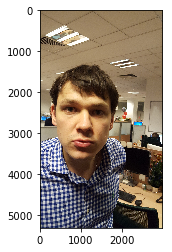

In [6]:
plt.imshow(src_img)
plt.show()

In [7]:
#src_int = cv2.resize(src_img, dsize=(0,0), fx=0.01, fy=0.01, interpolation=cv2.INTER_AREA)
src_sample[src_img_fname]['regions']

[{'center': {'IsEmpty': False, 'X': -0.495726466, 'Y': 0.088},
  'dir': {'IsEmpty': False, 'X': 0.0, 'Y': 1.0},
  'h': 0.0319999978,
  'w': 0.0997151},
 {'center': {'IsEmpty': False, 'X': -0.0569800548, 'Y': 0.062400002},
  'dir': {'IsEmpty': False, 'X': 0.0, 'Y': 1.0},
  'h': 0.032,
  'w': 0.111111104}]

In [ ]:
def generate_optimal_resize_sources(size_chain, minimal_factor):
    def calc_minimal_factor(size0, size1):
        if type(size0) in (tuple, list, np.ndarray):
            return np.min([a / b for (a,b) in zip(size0, size1)])
        return size0 / size1
    
    res = [0 for x in size_chain] #initialize with first element
    for i in range(1, len(size_chain)-1):
        for j in range(i + 1, len(size_chain)):
            if calc_minimal_factor(size_chain[i], size_chain[j]) >= minimal_factor:
                res[j] = i
    return res

In [26]:
%%time
samples = smpl.generate_sample_chain((src_img.shape[1]/2, src_img.shape[0]/2),
                                     (32,32), (0.7071, 0.7071), (16,16), (8, 8))

Wall time: 70.4 ms


In [20]:
imgregions = [smpl.transform_npregion_to_imgregion(
    smpl.transform_region_to_npregion(src_sample[src_img_fname]['regions'][i]))
              for i in range(len(src_sample[src_img_fname]['regions']))]

In [28]:
%%time
hit = smpl.calculate_sample_chain_target(samples, imgregions)

Wall time: 12.4 s


In [27]:
sum([len(x[1]) for x in samples])

127196

In [ ]:
img_sc = cv2.resize(src_img, dsize=(187, 332), interpolation=cv2.INTER_AREA)

In [ ]:
#samples
#hit
np.argmax([1,2,3,2, 3])

In [ ]:
rotm, trv, nsz = smpl.generate_rotation_information((src_img.shape[1], src_img.shape[0]), 1.3)
plt.imshow(cv2.warpAffine(src_img, np.hstack([rotm, trv]), (int(nsz[0]), int(nsz[1]))))
plt.show()

In [ ]:
trv

In [ ]:
samples[2][1][0][2:], samples[2][1][2][2:]

In [ ]:
calculate_sample_overlap_area_nd(samples[2][1][0], samples[2][1][16])

In [ ]:
samples[2][1][0], samples[2][1][16]

In [ ]:
np.prod([1,2,3])

In [ ]:
smpl.scale_imgregion((0.1,0.2,0.8,0.9), 10)